# **Network Models: BA networks and the Configuration Model**

<hr>

### Let us import the libraries.

In [16]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import networkx as nx

## **Barabási-Albert model**

#### To generate a Barabási-Albert network, we use the command nx.barabasi_albert_graph.

In [5]:
N = 1000

av_degree = 8
m = int(av_degree/2)

GBA = nx.barabasi_albert_graph(N, m, seed = 42)

#### The number of nodes and edges.

In [6]:
N = len(GBA)
M = GBA.number_of_edges()

In [7]:
print(f'Number of nodes: {N}')
print(f'Number of edges: {M}')
print(f'Avarage degree: {2*M/N}')

Number of nodes: 1000
Number of edges: 3984
Avarage degree: 7.968


In [8]:
GBA_ks, GBA_Pk = degree_distribution(GBA)

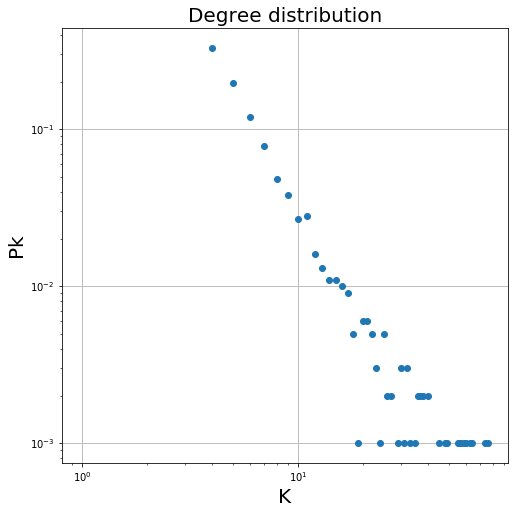

In [9]:
plt.figure(figsize = (8,8))

plt.loglog(GBA_ks, GBA_Pk, 'o', basex = 10, basey = 10)

plt.xlabel('K', fontsize = 20)
plt.ylabel('Pk', fontsize = 20)

plt.title('Degree distribution', fontsize = 20)

plt.grid(True)

In [10]:
M = np.column_stack((GBA_ks, GBA_Pk))
np.savetxt('BA_distribution.txt', M, delimiter='\t')

### **Configuration Model**

#### The configuration model produces random newtworks with a fiben degree sequence. Let us consider the Zipf function to define the degree distribution: $p(x) \approx x^{-a}$. It is possible to consider a Poisson distribution too (see the comments in the code).

In [18]:
N = 100 
a = 2.5

seq = np.random.zipf(a, N)

In [19]:
if sum(seq)%2 != 0:
    
    pos = np.randint(0, len(seq))
    
    seq[pos] = seq[pos] + 1

In [23]:
GCM = nx.configuration_model(seq, seed = 42)

In [24]:
Gcc = sorted(nx.connected_component_subgraphs(GCM), key = len, reverse = True)
G = Gcc[0]

d = dict(G.degree())

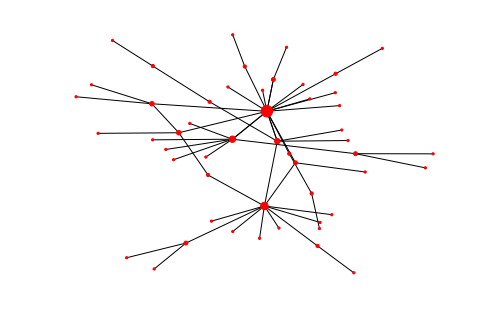

In [25]:
nx.draw(G, nodelist = d.keys(), node_size = [v*5 for v in d.values()])

In [26]:
N = len(G)
M = G.number_of_edges()

print(f'Number of nodes: {N}')
print(f'Number of edges: {M}')
print(f'Average degree: {2*M/N}')

Number of nodes: 51
Number of edges: 60
Average degree: 2.3529411764705883


In [27]:
G_ks, G_Pk = degree_distribution(G)

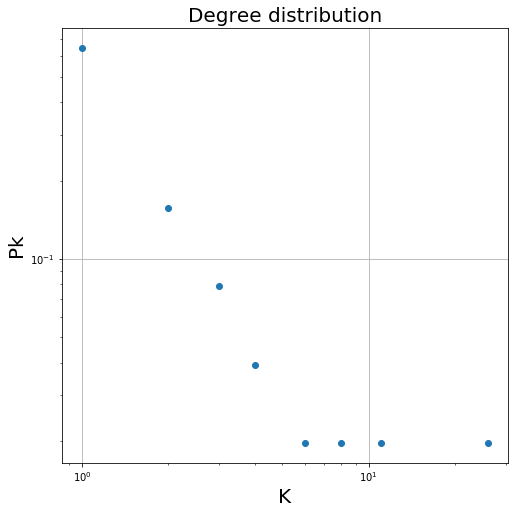

In [28]:
plt.figure(figsize = (8,8))

plt.loglog(G_ks, G_Pk, 'o', basex = 10, basey = 10)

plt.xlabel('K', fontsize = 20)
plt.ylabel('Pk', fontsize = 20)

plt.title('Degree distribution', fontsize = 20)

plt.grid(True)

In [29]:
M = np.column_stack((G_ks,G_Pk))
np.savetxt('CM_distribution.txt', M, delimiter='\t')

### **Functions**

In [1]:
def degree_distribution(G):
    
    vk = np.array(list(dict(G.degree()).values()))
    
    maxk = vk.max()
    minK = vk.min()
    
    kvalues = np.arange(maxk + 1)
    Pk = np.zeros(maxk + 1)
    
    for k in vk:
        
        Pk[k] += 1
        
    Pk = Pk/Pk.sum()
    
    return kvalues, Pk

In [18]:
nx.__version__

'2.0'

In [ ]:
! pip3 install networkx=2.3 --force-reinstall